## Imports

In [18]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib, os


In [19]:
## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
set_config(transform_output='pandas')

#import joblib

from IPython.core.display import clear_output

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)

## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


In [20]:
## Importing Custom Functions
import sys,os
# sys.path.append(os.path.abspath("../"))
%load_ext autoreload
%autoreload 2
#from CODE import data_enrichment as de

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#  Loading Objects from a Joblib

In [21]:
# load the data

loaded = joblib.load('Sales-Predictionsbest-models.joblib')
loaded.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [22]:
## Saving the loaded objects as separate varaibles

X_train = loaded['X_train']
X_test = loaded['X_test']
y_train = loaded['y_train']
y_test = loaded['y_test']

preprocessor = loaded['preprocessor']
lin_reg_final = loaded['LinearRegression']
rf_reg = loaded['RandomForestRegressor']

X_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8269           FDI60        7.220          Regular         0.064142   
7604           DRD25        6.135          Low Fat         0.079294   
2762           NCP18       12.150          Low Fat         0.028593   
6464           NCS30        5.945          Low Fat         0.093009   
4707           FDI08       18.200          Regular         0.066285   

                  Item_Type  Item_MRP Outlet_Identifier  \
8269           Baking Goods   61.2510            OUT010   
7604            Soft Drinks  111.2860            OUT018   
2762              Household  151.0708            OUT035   
6464              Household  127.8652            OUT035   
4707  Fruits and Vegetables  247.2092            OUT035   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8269                       1998         NaN               Tier 3   
7604                       2009      Medium               Tier 3   
2762                       2004       Small               Tier 2   
6464                       2004       Small               Tier 2   
4707                       2004       Small               Tier 2   

            Outlet_Type  
8269      Grocery Store  
7604  Supermarket Type2  
2762  Supermarket Type1  
6464  Supermarket Type1  
4707  Supermarket Type1

## Re-Creating X_train_df & X_test_df

In [23]:
## Use the preprocessor to transform X_train into X_train_proc
X_train_proc = preprocessor.transform(X_train)


## Use the preprocessor to transform X_test into X_test_df 

X_test_proc = preprocessor.transform(X_test)

#X_train_proc.head()

In [24]:
len(X_train)

6392

## Global Model Explanations

### Applying Shap

In [25]:
# Import and init shap
import shap
shap.initjs()

## Gather a small random sample to speed the process

In [26]:
# Take a sample of the training data (nsampel=500, use random_state=SEED)
X_shap = shap.sample(X_train_proc, nsamples = 500, random_state=SEED)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

Outlet_Size  Outlet_Location_Type  Item_Fat_Content_Low Fat  \
4469          2.0                   1.0                       0.0   
4438          0.0                   2.0                       1.0   
366           0.0                   2.0                       0.0   
2219          1.0                   0.0                       1.0   
6080          1.0                   1.0                       1.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
4469                       1.0                     0.0               1.0   
4438                       0.0                     0.0               0.0   
366                        1.0                     0.0               0.0   
2219                       0.0                     0.0               0.0   
6080                       0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
4469                  0.0               0.0              0.0   
4438                  0.0               0.0              0.0   
366                   0.0               0.0              0.0   
2219                  0.0               0.0              0.0   
6080                  0.0               0.0              0.0   

      Item_Type_Frozen Foods  ...  Item_Type_Soft Drinks  \
4469                     0.0  ...                    0.0   
4438                     0.0  ...                    0.0   
366                      0.0  ...                    0.0   
2219                     0.0  ...                    0.0   
6080                     0.0  ...                    0.0   

      Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
4469                      0.0                        0.0   
4438                      0.0                        0.0   
366                       0.0                        0.0   
2219                      0.0                        0.0   
6080                      0.0                        1.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
4469                            1.0                            0.0   
4438                            1.0                            0.0   
366                             1.0                            0.0   
2219                            1.0                            0.0   
6080                            0.0                            0.0   

      Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  \
4469                            0.0         7.72         0.074669   76.3986   
4438                            0.0         5.11         0.034868  163.8210   
366                             0.0         8.05         0.078386  256.4646   
2219                            0.0         8.76         0.050131  128.3336   
6080                            0.0         6.59         0.176748   82.7908   

      Outlet_Establishment_Year  
4469                     1987.0  
4438                     2004.0  
366                      2004.0  
2219                     1999.0  
6080                     1998.0  

[5 rows x 28 columns]

In [27]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
6181    4844.3608
717     1810.9760
6789    5932.2780
3608     302.9390
2472     188.4214
Name: Item_Outlet_Sales, Length: 500, dtype: float64

## Create SHAP Explainer and SHAP Values for Random Forest Model

In [28]:
# Instantiate a Model Explainer with the model
rf_explainer = shap.Explainer(rf_reg)

## Get shap values from the explainer
rf_shap_values = rf_explainer(X_shap)

In [29]:
rf_shap_values.shape

(500, 28)

## Shap Values Contents

Shap values includes the values for each feature, base values, and original data FOR EACH ROW

So, 500 rows by 28 features

In [30]:
rf_shap_values[0]

.values =
array([-1.46193600e+01, -3.80234922e+01,  1.40028559e+01,  9.38391183e+00,
       -1.36560039e+00,  1.69027335e+01, -3.70397439e-02, -7.92587505e+00,
       -8.48249801e-01,  1.38912778e+00, -2.37247226e+00, -5.86573073e-01,
       -5.22611859e-01,  3.58750311e+00,  5.62682281e-01, -9.38536830e-02,
       -3.74578046e-01, -2.20440962e+00, -1.06890953e+00, -1.26871468e+00,
        2.07878298e+02,  4.85604337e+00,  5.74922365e+00, -7.54851072e+01,
        7.08571516e+01,  2.81593938e+01, -9.47579448e+02, -7.62988224e+01])

.base_values =
array([2154.71233664])

.data =
array([2.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       7.72000

## Summary Bar Plot: Random Forest

The show=False flag will allow us to manipulate the figure using matplotlib.

Text(0.5, 1.0, 'Random Forest SHAP Summary')

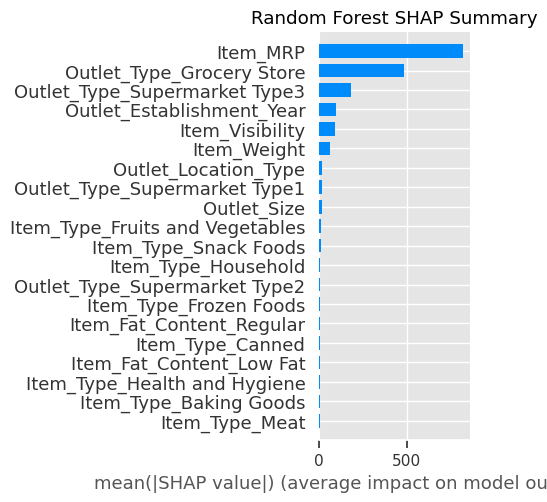

In [31]:
## create a summary plot (bar version)
fig = shap.summary_plot(rf_shap_values, features = X_shap, plot_type='bar',
                 show=False, plot_size=[5,5])

plt.title('Random Forest SHAP Summary')

In [32]:
print(type(fig))
fig

<class 'NoneType'>


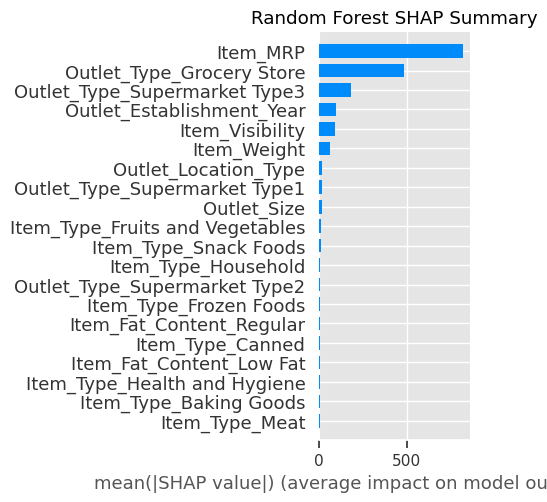

In [33]:
# save visualization
fig, ax = plt.subplots()
shap.summary_plot(rf_shap_values, features = X_shap, plot_type='bar',
                 show=False, plot_size=[5,5])
ax.set_title('Random Forest SHAP Summary')

fig.savefig('images/RFShapbarplot.png')

<img src="images/top5mostimportantfeatures.png" width=60%>

According to SHAP the most important features are the:

* Item_MRP
* Outlet_Type_Grocery_Store
* Outlet_Type_Supermarket Type3
* Outlet_Establishment_Year
* Item_Visibility

Both of these Models have 4 out of 5 features that are the same. The difference with the SHAP model is the Outlet_Establishment_year feature is of higher importance than the Item_Weight. 

## SHAP Dot Plot for Random Forest Model

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


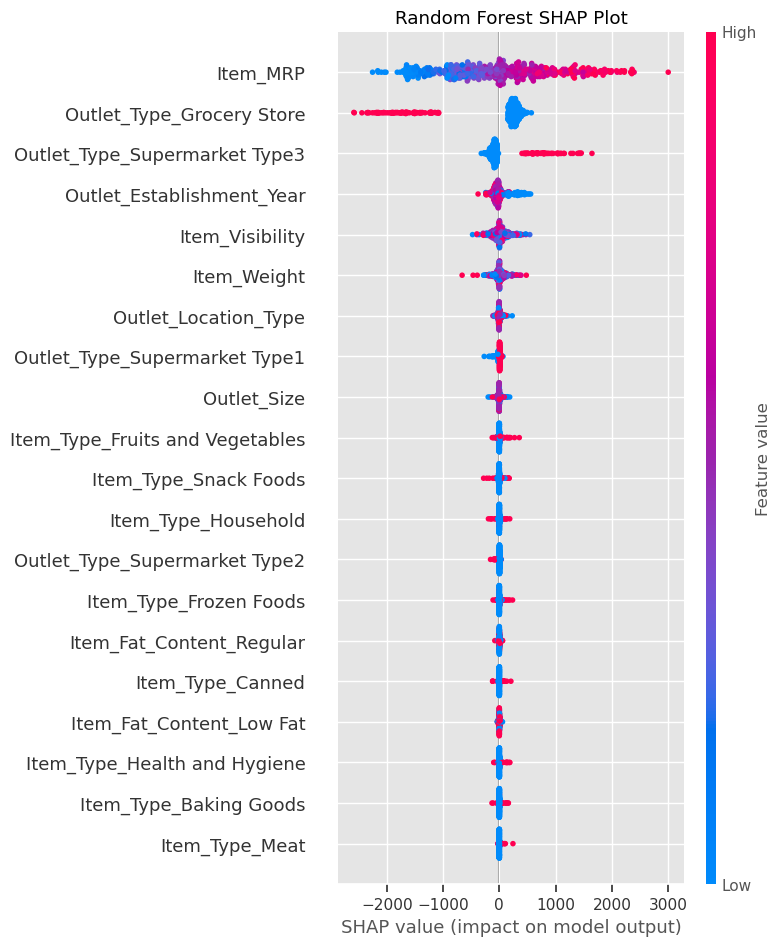

In [34]:
## create a summary plot for Random Forest (dot/default version)
fig2 = shap.summary_plot(rf_shap_values, features=X_shap, show=False)

plt.title('Random Forest SHAP Plot')
plt.show();

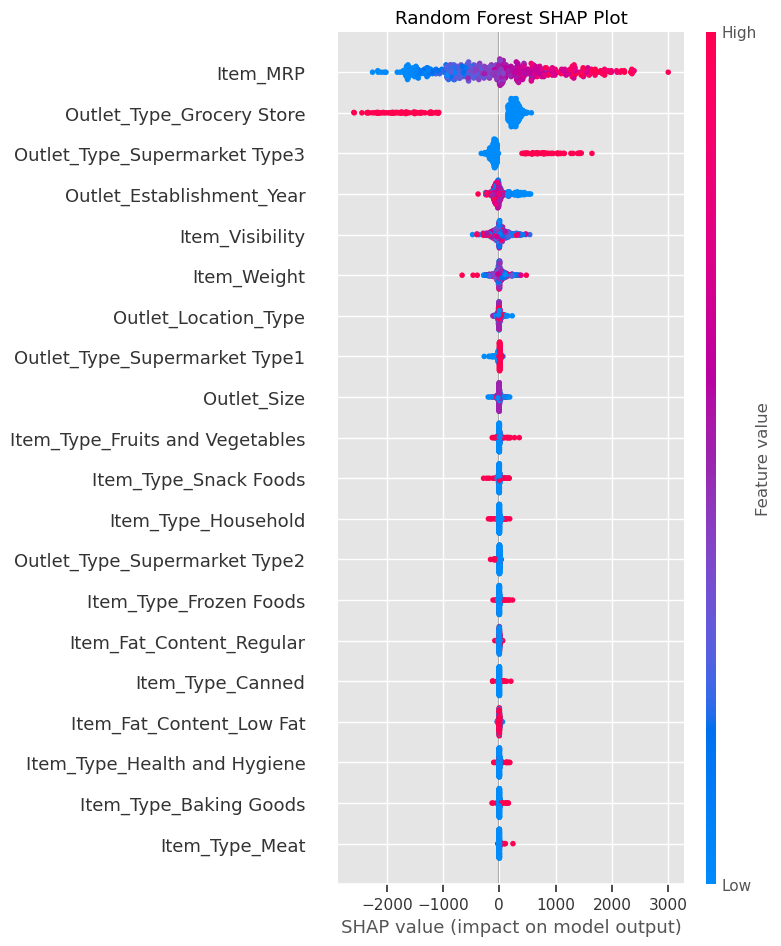

In [35]:
# save visualization
fig, ax = plt.subplots()

shap.summary_plot(rf_shap_values, features=X_shap, show=False)
ax.set_title('Random Forest SHAP Plot')

fig.savefig('images/RFShapDotplot.png')

According to the SHAP Dot Plot the top 3 most important features are:
* Item_MRP - Item_MRP had the largest effect on the model's predictions (since it was the first bar at the top of the graph).
    - Because red values are on the right (positive), we can see the greater the price per item, the more likely the model would predict to generate more sales.


* Outlet_Type_Grocery_Store - Because the red dots are on the left (negative) we can see that the grocery store has a decline in sales per item, this model will predict this outlet type to have fewer sales per item than Supermarket Type3.


* Outlet_Type_Supermarket Type3 - Notice that the blue dots (fewer ) are only slightly to the left of the 0-line, indicating that the model is only slightly less likely to predict lower sales per item, compared to the big impact of having a large number of sales per item.

These are the same top 3 features as the RF Shap bar plot.

# Local Explanations
In this section I will choose at least 2 example rows and provide an explanation. For each example I will produce a Lime Tabular explanation and an individual Force Plot.


In [36]:
print (X_shap.index[:5])

Int64Index([4469, 4438, 366, 2219, 6080], dtype='int64')


In [37]:
## Reset index
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)
X_shap_local.head()

Outlet_Size  Outlet_Location_Type  Item_Fat_Content_Low Fat  \
0          2.0                   1.0                       0.0   
1          0.0                   2.0                       1.0   
2          0.0                   2.0                       0.0   
3          1.0                   0.0                       1.0   
4          1.0                   1.0                       1.0   

   Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
0                       1.0                     0.0               1.0   
1                       0.0                     0.0               0.0   
2                       1.0                     0.0               0.0   
3                       0.0                     0.0               0.0   
4                       0.0                     0.0               0.0   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                  0.0               0.0              0.0   
1                  0.0               0.0              0.0   
2                  0.0               0.0              0.0   
3                  0.0               0.0              0.0   
4                  0.0               0.0              0.0   

   Item_Type_Frozen Foods  ...  Item_Type_Soft Drinks  \
0                     0.0  ...                    0.0   
1                     0.0  ...                    0.0   
2                     0.0  ...                    0.0   
3                     0.0  ...                    0.0   
4                     0.0  ...                    0.0   

   Item_Type_Starchy Foods  Outlet_Type_Grocery Store  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        1.0   

   Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
0                            1.0                            0.0   
1                            1.0                            0.0   
2                            1.0                            0.0   
3                            1.0                            0.0   
4                            0.0                            0.0   

   Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  \
0                            0.0         7.72         0.074669   76.3986   
1                            0.0         5.11         0.034868  163.8210   
2                            0.0         8.05         0.078386  256.4646   
3                            0.0         8.76         0.050131  128.3336   
4                            0.0         6.59         0.176748   82.7908   

   Outlet_Establishment_Year  
0                     1987.0  
1                     2004.0  
2                     2004.0  
3                     1999.0  
4                     1998.0  

[5 rows x 28 columns]

## Example A- Item_MRP

This feature was selected since it was the top most important feature on both the bar and Dot plot.

In [38]:
X_shap_local['Item_MRP'].describe()

## Getting the shap values wth the local X_shap 
#shap_values = explainer(X_shap_local,y_shap_local)
#shap_vals_1 = shap_values[:,:,1]

count    500.000000
mean     137.080641
std       61.602641
min       32.355800
25%       90.084950
50%      140.432500
75%      179.517300
max      264.722600
Name: Item_MRP, dtype: float64

In [39]:
idx_price_item = X_shap_local['Item_MRP'].idxmax()
idx_price_item

431

In [40]:
X_shap_local.iloc[idx_price_item]

Outlet_Size                           1.000000
Outlet_Location_Type                  1.000000
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      1.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Type_Grocery Store             0.000000
Outlet_Type_S

In [41]:
y_shap_local.iloc[idx_price_item]

3171.8712

### Shap Force Plots

Force Plot - RandomForest explanation

In [42]:
## plotting example force plot 
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[idx_price_item].values,
               features = X_shap_local.iloc[idx_price_item])

### Interpretation of Individual Force Plot

* Base value suggest 2155 Rupees in sales while the model predicted 3451.83 Rupees 

* Item_MRP, with the value of 264.7, is pushing the prediction toward a higher value (red bar).

* Outlet_Type_Grocery_Store = 0 (item not sold at Grocery Store) is also pushing the prediction toward a higher value possibly because items not carried at Grocery store and have a higher value when sold at other Outlet Types.

* Outlet_Establishment_Year = 2009 is pushing the prediction toward a lower value which means store presentation can have an impact on sales.

### Lime: Random Forest Local Explanation

In [43]:
 from lime.lime_tabular import LimeTabularExplainer
    
## Create a lime explainer with X_shap_local with regression as the mode

lime_explainer = LimeTabularExplainer(training_data = X_shap_local.values,
                                     feature_names = X_shap_local.columns,
                                     mode = 'regression')

lime_explainer


In [44]:
## Use the lime explainer to explain the selected example used above
exp = lime_explainer.explain_instance(X_shap_local.loc[idx_price_item],
                                     rf_reg.predict)
exp.show_in_notebook();

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### Interpretation of LIME table

The model predicts this feature has a sales value of 3451.83

There are several features that were associated with price increased and the following features have the most significant impact:

* Outlet_Type_Grocery Store Value = 0, which means item is not being sold at grocery store actually helps increase sale prices at other Outlet Types .

* Item_MRP predicted 179.52, where in reality this sample has Item_MRP listed at 264.72 per item.

* Item_Visibility also plays a roll on item sales with a value of 0.03 meaning the way the item is displayed at the store can drive up sales opposed if its hidden at the back of the shelf.

In [52]:
## getting the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect        Value
0        Outlet_Type_Grocery Store <= 0.00  2049.136843
1     Outlet_Type_Supermarket Type3 > 0.00   852.568320
2               90.08 < Item_MRP <= 140.43  -541.838634
3     Outlet_Establishment_Year <= 1987.00   199.752030
4                 Item_Type_Others <= 0.00   129.938872
5              Item_Type_Breakfast <= 0.00   128.317287
6              Item_Type_Household <= 0.00   -78.854043
7  Item_Type_Fruits and Vegetables <= 0.00   -56.890294
8                Item_Type_Seafood <= 0.00    55.373020
9    Outlet_Type_Supermarket Type2 <= 0.00    50.690410

## Example B - Outlet_Type_Supermarket Type3


This feature was selected since it was the 3rd most important feature on both the bar and Dot plot.

In [45]:
X_shap_local['Outlet_Type_Supermarket Type3'].describe()


count    500.000000
mean       0.110000
std        0.313203
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Outlet_Type_Supermarket Type3, dtype: float64

In [46]:
idx_max = X_shap_local['Outlet_Type_Supermarket Type3'].idxmax()
idx_max

22

In [47]:
X_shap_local.iloc[idx_max]

Outlet_Size                           1.000000
Outlet_Location_Type                  1.000000
Item_Fat_Content_Low Fat              1.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               1.000000
Outlet_Type_Grocery Store             0.000000
Outlet_Type_S

In [48]:
y_shap_local.iloc[idx_max]

3954.852

## Shap Force Plots
Force Plot - RandomForest explanation

In [57]:
## plotting example force plot 
shap.force_plot(rf_explainer.expected_value,
               shap_values=rf_shap_values[idx_max].values,
               features = X_shap_local.iloc[idx_max])

### Example B- Interpretation of Individual Force Plot

* Base value is 2155 while the predicted value is much higher at 3702.05


* Outlet_Type_Supermarket Type3 = 1 - As you can see, this is the most important feature with the largest negative effect.

    * Visually, the color with the wider bar "wins", and this decides the prediction

* Outlet_Type_Grocery_Store = 0 - has contributed negatively to sales per item.

* Outlet_Establishment_Year = 1985 - the year this establishment was opened also has a negative effect. 

### Lime: Random Forest Local Explanation

In [58]:
 from lime.lime_tabular import LimeTabularExplainer
    
## Create a lime explainer with X_shap_local with regression as the mode

lime_explainer = LimeTabularExplainer(training_data = X_shap_local.values,
                                     feature_names = X_shap_local.columns,
                                     mode = 'regression')

lime_explainer


In [59]:
## Use the lime explainer to explain the selected example used above
exp2 = lime_explainer.explain_instance(X_shap_local.loc[idx_max],
                                     rf_reg.predict)
exp2.show_in_notebook();



X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [60]:
## getting the explanation values as a list
exp2_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp2_df

Effect        Value
0     Outlet_Type_Grocery Store <= 0.00  2084.239721
1  Outlet_Type_Supermarket Type3 > 0.00   904.862156
2            90.08 < Item_MRP <= 140.43  -561.241598
3             Item_Type_Seafood <= 0.00  -474.047343
4           Item_Type_Breakfast <= 0.00  -426.990844
5  Outlet_Establishment_Year <= 1987.00   185.695797
6              Item_Type_Others <= 0.00  -121.966548
7               Item_Visibility <= 0.03    86.370704
8                Item_Type_Meat <= 0.00   -81.806636
9                   Outlet_Size <= 1.00    79.063115

### Example B- Interpretation of LIME table

The model predicts this feature has a sales value of 3702.05


The top 3 most impactful features were associated in a positive way:
* Outlet_Type_Grocery Store <= 0 - actually has 0

* Outlet_Type_Supermarket Type3 >0 actually has 0

* Outlet_Establishment_Year <= 1987 actually is 1985
